HDB Resale Data Analytics
===
---

Background of HDB Resale Capstone Project
---

Getting a HDB is probably one of the biggest financial decisions many Singaporeans have to make, given its exhorbitant cost. Making a wrong decision could set you back several years in terms of opportunity cost & time value of money. 


In this project, we seek to build data visualisation to shed light on the HDB resale market, and provide key consideration parameters to help us make better decisions in choosing a: <br>

(1) HDB Resale flat, or <br>
(2) BTO flats that are likely to appreciate in the resale market

In [12]:
#Loading the Dataset hdb_resale_listings 
# Run this cell to load the HDB listings data into a nested list

import csv
hdb_resale_listings = []

with open('data/HDB_Resale_With_Geocoordinates.csv', newline='', encoding="utf8") as f:
    reader = csv.reader(f)
    for row in reader:
        hdb_resale_listings.append(row)

    # Remove header
    hdb_resale_listings_headers = hdb_resale_listings[0]
    hdb_resale_listings = hdb_resale_listings[1:3000]
    
print(hdb_resale_listings[0]) # Print first row of data


['2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', '44', 'Improved', '1979', '61 years 04 months', '232000', '406 ANG MO KIO AVE 10', '103.8538799', '1.362004539']


For your visualisation, we display a snippet of the <b>hdb_resale_listings</b> nested list in a tabular format. 

In [2]:
import pandas as pd

hdb_resale_df = pd.read_csv("data/HDB_Resale_With_Geocoordinates.csv")
hdb_resale_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10,103.853880,1.362005
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4,103.838202,1.370966
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5,103.835368,1.380709
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10,103.857201,1.366201
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5,103.835132,1.381041


Data Cleaning
---
 data columns cleaned are:
- floor_area_sqm (convert to float)
- remaining_lease (extract only the years & convert it to float)
- resale_price (convert to float)
- longitude (convert to float)
- latitude (convert to float)



In [13]:
# Run this cell of code to clean the csv dataset

# Iterate through nested list of HDB resale data
for row in hdb_resale_listings:
    
    # Extract data from specific columns and store into variables for easy access
    floor_area_sqm = row[6]
    lease_remaining = row[9]                 
    resale_price = row[10]
    longitude = row[12]
    latitude = row[13]
    
    row[6] = float(floor_area_sqm)
    
    # If lease_remaining info is of string data type
    if isinstance(lease_remaining,str):
        row[9] = int(lease_remaining[:2]) # Get years of lease remaining with slicing, and convert it to int type
   
    row[10] = float(resale_price)
    
    if longitude == '':
        row[12] = 0
    else:
        row[12] = float(longitude)
        
    if latitude == '':
        row[13] = 0
    else:
        row[13] = float(latitude)

print(hdb_resale_listings[:5]) # Print first 5 rows of data

[['2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', 44.0, 'Improved', '1979', 61, 232000.0, '406 ANG MO KIO AVE 10', 103.8538799, 1.362004539], ['2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', 67.0, 'New Generation', '1978', 60, 250000.0, '108 ANG MO KIO AVE 4', 103.8382019, 1.370966352], ['2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', 67.0, 'New Generation', '1980', 62, 262000.0, '602 ANG MO KIO AVE 5', 103.8353682, 1.38070883], ['2017-01', 'ANG MO KIO', '3 ROOM', '465', 'ANG MO KIO AVE 10', '04 TO 06', 68.0, 'New Generation', '1980', 62, 265000.0, '465 ANG MO KIO AVE 10', 103.857201, 1.366201041], ['2017-01', 'ANG MO KIO', '3 ROOM', '601', 'ANG MO KIO AVE 5', '01 TO 03', 67.0, 'New Generation', '1980', 62, 265000.0, '601 ANG MO KIO AVE 5', 103.8351317, 1.381041355]]


In [10]:
hdb_resale_df = pd.DataFrame(hdb_resale_listings, columns = hdb_resale_listings_headers)
hdb_resale_df


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,406 ANG MO KIO AVE 10,103.853880,1.362005
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,108 ANG MO KIO AVE 4,103.838202,1.370966
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,602 ANG MO KIO AVE 5,103.835368,1.380709
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,465 ANG MO KIO AVE 10,103.857201,1.366201
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,601 ANG MO KIO AVE 5,103.835132,1.381041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,2017-03,JURONG EAST,3 ROOM,248,JURONG EAST ST 24,10 TO 12,82.0,New Generation,1983,65,348000.0,248 JURONG EAST ST 24,103.740101,1.342273
2995,2017-03,JURONG EAST,3 ROOM,308,JURONG EAST ST 32,07 TO 09,92.0,Model A,1984,66,357000.0,308 JURONG EAST ST 32,103.734584,1.347308
2996,2017-03,JURONG EAST,3 ROOM,23,TEBAN GDNS RD,34 TO 36,72.0,Model A,2013,95,410000.0,23 TEBAN GDNS RD,103.739239,1.322858
2997,2017-03,JURONG EAST,4 ROOM,408,PANDAN GDNS,04 TO 06,97.0,New Generation,1978,60,327000.0,408 PANDAN GDNS,103.748816,1.318204


Data Preparation and Visualisation of Resale count and Average cost
--- 

In [14]:
#Calculate the Number of Resale Flats in Each Town
town_num_resale = {}  
import operator
for row in hdb_resale_listings:
    HDB_Town = row[1]
    if HDB_Town in town_num_resale :
        town_num_resale[HDB_Town] +=1
    else:
        town_num_resale[HDB_Town] = 1
        
resale_counts_by_town = dict(sorted(town_num_resale.items(), key=operator.itemgetter(1), reverse = True))

print(resale_counts_by_town)





{'BEDOK': 243, 'HOUGANG': 232, 'ANG MO KIO': 187, 'JURONG WEST': 172, 'BUKIT MERAH': 167, 'SENGKANG': 164, 'CHOA CHU KANG': 160, 'WOODLANDS': 157, 'TAMPINES': 152, 'YISHUN': 152, 'BUKIT BATOK': 148, 'BUKIT PANJANG': 121, 'PUNGGOL': 114, 'GEYLANG': 106, 'CLEMENTI': 97, 'BISHAN': 94, 'JURONG EAST': 84, 'KALLANG/WHAMPOA': 81, 'TOA PAYOH': 74, 'PASIR RIS': 68, 'SEMBAWANG': 55, 'SERANGOON': 51, 'CENTRAL AREA': 47, 'QUEENSTOWN': 45, 'BUKIT TIMAH': 14, 'MARINE PARADE': 14}


dict_values([243, 232, 187, 172, 167, 164, 160, 157, 152, 152, 148, 121, 114, 106, 97, 94, 84, 81, 74, 68, 55, 51, 47, 45, 14, 14]) dict_keys(['BEDOK', 'HOUGANG', 'ANG MO KIO', 'JURONG WEST', 'BUKIT MERAH', 'SENGKANG', 'CHOA CHU KANG', 'WOODLANDS', 'TAMPINES', 'YISHUN', 'BUKIT BATOK', 'BUKIT PANJANG', 'PUNGGOL', 'GEYLANG', 'CLEMENTI', 'BISHAN', 'JURONG EAST', 'KALLANG/WHAMPOA', 'TOA PAYOH', 'PASIR RIS', 'SEMBAWANG', 'SERANGOON', 'CENTRAL AREA', 'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'])


<ipython-input-38-b20177c0ef6d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(resale_location, rotation= 90)


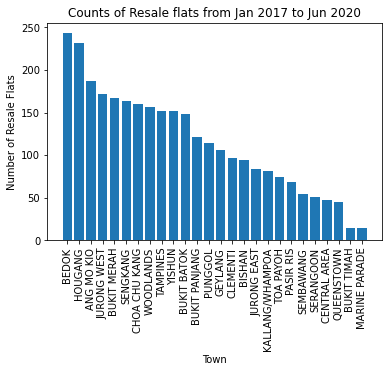

In [38]:
#Visualise the Number of Resale Flats in Each Town
import matplotlib.pyplot as plt


resale_location = resale_counts_by_town.keys()
resale_count = resale_counts_by_town.values()
print(resale_count,resale_location)
fig,ax = plt.subplots()
ax.bar(resale_location,resale_count)
ax.set_xlabel("Town")
ax.set_ylabel("Number of Resale Flats")
ax.set_xticklabels(resale_location, rotation= 90)
ax.set_title("Counts of Resale flats from Jan 2017 to Jun 2020")

plt.show()


We observe that developing estates such as **Sengkang, Punggol, and Woodlands** tend to have a much higher volume of resale flats compared to mature estates such as Bishan and Marine Parade, which do not have as much land parcels available for development. 

These difference in resale volume could be due to:
- **Young couples upgrading from their initial BTOs** in nearby areas (more prevalent in areas such as Sengkang, Punggol, Woodlands)
- **Potential for housing appreciation** in developing estates like Sengkang and Punggol due to new amenities being developed

In [15]:
#Calculate the Total Sale Value in Each Town
town_resale_value_total = {} 
town_num_resale = {}

for row in hdb_resale_listings:
    hdb_town = row[1]
    sale_value = row[10]
    if hdb_town in town_resale_value_total:
        town_resale_value_total[hdb_town] += sale_value 
        #update the no. of resale units
        town_num_resale[hdb_town] += 1
    else: 
        town_resale_value_total[hdb_town] = sale_value
        #count the num of resale units
        town_num_resale[hdb_town] = 1

print(town_num_resale)
print(town_resale_value_total)

{'ANG MO KIO': 187, 'BEDOK': 243, 'BISHAN': 94, 'BUKIT BATOK': 148, 'BUKIT MERAH': 167, 'BUKIT PANJANG': 121, 'BUKIT TIMAH': 14, 'CENTRAL AREA': 47, 'CHOA CHU KANG': 160, 'CLEMENTI': 97, 'GEYLANG': 106, 'HOUGANG': 232, 'JURONG EAST': 84, 'JURONG WEST': 172, 'KALLANG/WHAMPOA': 81, 'MARINE PARADE': 14, 'PASIR RIS': 68, 'PUNGGOL': 114, 'QUEENSTOWN': 45, 'SEMBAWANG': 55, 'SENGKANG': 164, 'SERANGOON': 51, 'TAMPINES': 152, 'TOA PAYOH': 74, 'WOODLANDS': 157, 'YISHUN': 152}
{'ANG MO KIO': 78767928.0, 'BEDOK': 99151816.0, 'BISHAN': 60965680.0, 'BUKIT BATOK': 55632628.0, 'BUKIT MERAH': 88848604.0, 'BUKIT PANJANG': 50648696.0, 'BUKIT TIMAH': 9487888.0, 'CENTRAL AREA': 30027000.0, 'CHOA CHU KANG': 63407616.0, 'CLEMENTI': 44673988.0, 'GEYLANG': 42237963.0, 'HOUGANG': 98106404.0, 'JURONG EAST': 31804564.0, 'JURONG WEST': 68457740.0, 'KALLANG/WHAMPOA': 38120258.0, 'MARINE PARADE': 7985000.0, 'PASIR RIS': 32060888.0, 'PUNGGOL': 53488992.0, 'QUEENSTOWN': 24355688.0, 'SEMBAWANG': 22306775.0, 'SENGKANG':

In [16]:
import operator
#Calculate the Average Resale Value in Each Town
town_resale_average = {} 

for row in town_num_resale.keys():

    town_resale_average[row] = round(town_resale_value_total[row]/town_num_resale[row])
town_resale_average = dict(sorted(town_resale_average.items(), key = operator.itemgetter(1), reverse = True))
print(town_resale_average)

                                      

{'BUKIT TIMAH': 677706, 'BISHAN': 648571, 'CENTRAL AREA': 638872, 'MARINE PARADE': 570357, 'QUEENSTOWN': 541238, 'BUKIT MERAH': 532028, 'TOA PAYOH': 472922, 'TAMPINES': 472784, 'PASIR RIS': 471484, 'KALLANG/WHAMPOA': 470620, 'PUNGGOL': 469202, 'SERANGOON': 464570, 'CLEMENTI': 460557, 'SENGKANG': 431827, 'HOUGANG': 422872, 'ANG MO KIO': 421219, 'BUKIT PANJANG': 418584, 'BEDOK': 408032, 'SEMBAWANG': 405578, 'GEYLANG': 398471, 'JURONG WEST': 398010, 'CHOA CHU KANG': 396298, 'WOODLANDS': 391826, 'YISHUN': 380111, 'JURONG EAST': 378626, 'BUKIT BATOK': 375896}


<ipython-input-18-b6131a21a715>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(town_location, rotation = 90)


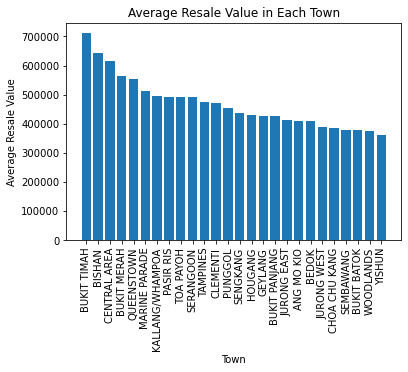

In [18]:
# Visualise the Average Resale Value in Each Town

town_resale_average = {'BUKIT TIMAH': 710340, 'BISHAN': 642071, 'CENTRAL AREA': 617000, 'BUKIT MERAH': 563895, 'QUEENSTOWN': 555064, 'MARINE PARADE': 513160, 'KALLANG/WHAMPOA': 494174, 'PASIR RIS': 491736, 'TOA PAYOH': 490482, 'SERANGOON': 490438, 'TAMPINES': 473431, 'CLEMENTI': 471047, 'PUNGGOL': 453275, 'SENGKANG': 435548, 'HOUGANG': 431527, 'GEYLANG': 427708, 'BUKIT PANJANG': 426422, 'JURONG EAST': 413548, 'ANG MO KIO': 409744, 'BEDOK': 409303, 'JURONG WEST': 388924, 'CHOA CHU KANG': 386099, 'SEMBAWANG': 379180, 'BUKIT BATOK': 377679, 'WOODLANDS': 377002, 'YISHUN': 362941}

## Write your code below
town_location = town_resale_average.keys()
town_average = town_resale_average.values()

fig,ax = plt.subplots()

ax.bar(town_location, town_average)
ax.set_xlabel("Town")
ax.set_ylabel("Average Resale Value")
ax.set_title("Average Resale Value in Each Town")
ax.set_xticklabels(town_location, rotation = 90)
plt.show()



Unsurprisingly, **HDB flats in central areas like Bukit Timah and Bishan have some of the highest resale values**. The convenience of living in these areas also contribute to the huge demand of BTO flats there; getting a BTO in these areas is almost like striking the lottery!

One interesting observation is the surprisingly high resale value of Punggol flats relative to other towns. While some may have the impression that Punggol flats are inaccessible and not desirable, the average resale value tells a different story. Observe that Punggol's resale value is markedly higher than areas like Ang Mo Kio and Bedok. In addition, the average resale value of Punggol flats is not that far off from matured estates like Clementi, Tampines & Serangoon.

A potential follow-up visualisation would be a time-series analysis of the Punggol HDB resale values over the years, and one might discover significant capital appreciation opportunities for Punggol BTO owners in the resale market!

In [17]:
#Is the Lease an Important Factor in the HDB Resale Price
average_resale_for_lease_year_remaining = {45: 226042, 46: 242145, 47: 246401, 48: 254636, 49: 260232, 50: 269885, 51: 296375, 52: 325913, 53: 354740, 54: 364082, 55: 366896, 56: 379482, 57: 362915, 58: 358926, 59: 361077, 60: 363807, 61: 363912, 62: 368609, 63: 386043, 64: 389136, 65: 401178, 66: 405131, 67: 409869, 68: 423459, 69: 431147, 70: 446439, 71: 488230, 72: 502543, 73: 513224, 74: 509820, 75: 485555, 76: 480516, 77: 467435, 78: 461030, 79: 457907, 80: 458187, 81: 448684, 82: 458495, 83: 452845, 84: 457780, 85: 475330, 86: 539646, 87: 572114, 88: 563815, 89: 536062, 90: 639708, 91: 596058, 92: 579430, 93: 521120, 94: 453963, 95: 451161, 96: 679590}

lease = list(average_resale_for_lease_year_remaining.keys())
average_resale_value = list(average_resale_for_lease_year_remaining.values())

## Write your code below

fig, ax = plt.subplots()

ax.plot(lease,average_resale_value, marker = 'd')
ax.set_xlabel('lease Remaining')
ax.set_ylabel('Resale Value')
ax.set_title("Average Resale Value for Lease Years Remaining")

plt.show()




NameError: name 'plt' is not defined

Despite Minister Mah Bow Tan's [sweeping claim](https://omh.sg/blog/post/minister-lawrence-wongs-comments-how-story-unfolded) in 2011 that HDB is an asset that will appreciate in value over time, the above chart clearly shows that this is a flawed notion. This line plot illustrates a close correlation between the remaining lease period and the resale value of flats sold after 2017, which can be corroborated with Minister Lawrence Wong's [blog post](https://mndsingapore.wordpress.com/2017/03/24/choosing-a-home-for-life/) in March 2017. If you are looking for a resale flat, it is important to exercise caution for HDB resale flats with short leases.

Another observation from this chart is that, BTO owners who sell their flats near the Minimum Occupancy Period (MOP), with about 90 years of lease remaining, are likely to gain maximum resale value out of on their subsidised flats!

In [10]:
hdb_resale_df.head(3)  

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10,103.853880,1.362005
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4,103.838202,1.370966
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5,103.835368,1.380709


How does Floor Area Correlate with Resale Price?
---

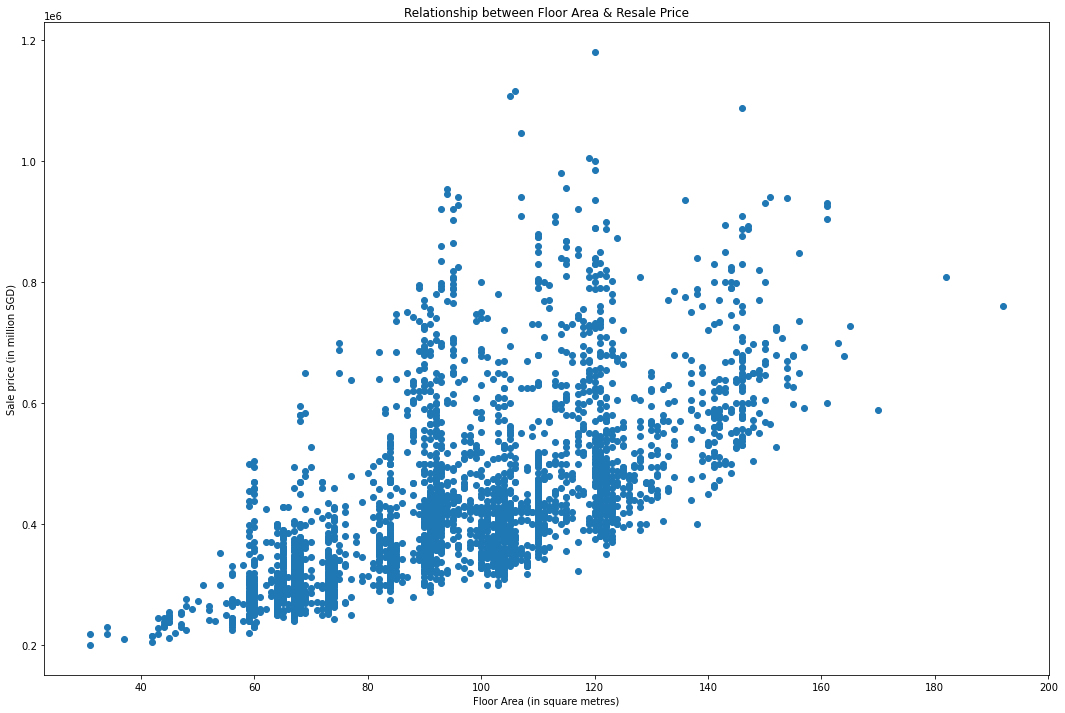

In [18]:
##How does Floor Area Correlate with Resale Price?
import matplotlib.pyplot as plt
floor_area = []
resale_price = []
for row in hdb_resale_listings:
    floor_area.append(row[6])
    resale_price.append(row[10])
fig, ax = plt.subplots(figsize=(18,12))
ax.scatter(floor_area, resale_price)
ax.set_xlabel("Floor Area (in square metres)")
ax.set_ylabel("Sale price (in million SGD)")
ax.set_title("Relationship between Floor Area & Resale Price")
plt.show()

The scatterplot above shows that <b>floor area is closely and positively correlated with HDB resale prices</b>, with some variance that can likely be attributed to their locations (as investigated above). If you're looking for a large HDB flat, be prepared to pay!

Comparing Select 4 Room Flats in Singapore
---

In [19]:
## Comparing Select 4 Room Flats in Singapore
## in 5 towns: Punggol, Tampines, Woodlands, Clementi and Yishun.

punggol = []
tampines = []
woodlands = []
clementi = []
yishun = []

for row in hdb_resale_listings:
    
    if row[2] == '4 ROOM':
        
        town = row[1]
        
        if town == 'PUNGGOL':
            punggol.append(row[10])
            
        elif town == 'TAMPINES':
            tampines.append(row[10])
            
        elif town == 'WOODLANDS':
            woodlands.append(row[10])
            
        elif town == 'CLEMENTI':
            clementi.append(row[10])
            
        elif town == 'YISHUN':
            yishun.append(row[10])
     
    
# Print the first 5 items in each list
print(punggol[:5])
print(tampines[:5])
print(woodlands[:5])
print(clementi[:5])
print(yishun[:5])

[350000.0, 370000.0, 370000.0, 380000.0, 408000.0]
[370000.0, 385000.0, 394000.0, 395000.0, 398000.0]
[288000.0, 295000.0, 300000.0, 306000.0, 323000.0]
[385000.0, 397000.0, 425000.0, 440000.0, 461000.0]
[300000.0, 300000.0, 305000.0, 310000.0, 315000.0]


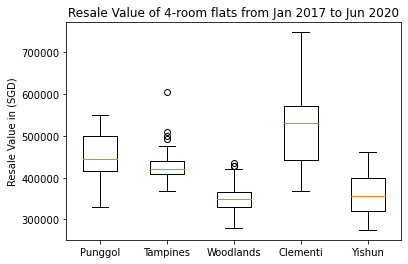

In [20]:

import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.boxplot([punggol, tampines,woodlands,clementi,yishun])
plt.xticks([1,2,3,4,5],['Punggol','Tampines','Woodlands','Clementi','Yishun'])
ax.set_ylabel("Resale Value in (SGD)")
ax.set_title("Resale Value of 4-room flats from Jan 2017 to Jun 2020")
plt.show()

From the boxplot, we see that **4-room resale flats in Clementi tend to cost more and can have a huge variance in price**. If you're on a very tight budget, a resale flat in Woodlands may be the optimal choice. 4-room resales flats in Punggol and Tampines have similar prices, so **it would be helpful to zoom into Punggol & Tampines estates and compare the amenities available** to specific flats and sub-areas in each town, in order to make a more informed decision.

Utilising Folium Heatmap to display the number of resale listings in Singapore
---

In [21]:
import folium
from folium.plugins import HeatMap     

lat_and_long = []
for row in hdb_resale_listings:
    if row[2] == '4 ROOM':
        long = row[12]
        lat = row[13]
        lat_and_long.append([lat,long])  

ten_folium = folium.Map([1.357,103.826], height=350, width=800, zoom_start=11.4)
HeatMap(lat_and_long, radius = 8, gradient = {0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(ten_folium)
display(ten_folium)

In [22]:

from folium.plugins import MarkerCluster

HDB_Resale_map = folium.Map([1.357,103.826], height = 550, width = 900, zoom_start = 11.5)
markercluster = MarkerCluster().add_to(HDB_Resale_map)
lat_long_2 = []
for row in hdb_resale_listings:
    if row[2] == '4 ROOM':
        long = row[12]
        lat = row[13]
        sales = row[10]
        location = row[11]
        floor = row[5]
        size = row[6]
        flat_type = row[2]
        folium.Marker( location=[lat,long], popup="Address: "+ location+"\n" +"Type: "+flat_type+"\n"+"Price:$"+str(sales)+"\n"+"Floor: "+floor+"\n"+"SQM: "+str(size)+"\n",icon=None,).add_to(markercluster)
display(HDB_Resale_map)

HDB_Resale_map.save("index.html")